In [3]:

import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
#Loss and Autograd together
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [5]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 2.8815e-03,  2.8815e-03,  2.8815e-03,  ...,  2.8815e-03,
          2.8815e-03,  2.8815e-03],
        [-9.6081e-05, -9.6081e-05, -9.6081e-05,  ..., -9.6081e-05,
         -9.6081e-05, -9.6081e-05],
        [ 1.2010e-03,  1.2010e-03,  1.2010e-03,  ...,  1.2010e-03,
          1.2010e-03,  1.2010e-03],
        ...,
        [-1.6559e-03, -1.6559e-03, -1.6559e-03,  ..., -1.6559e-03,
         -1.6559e-03, -1.6559e-03],
        [ 5.1427e-05,  5.1427e-05,  5.1427e-05,  ...,  5.1427e-05,
          5.1427e-05,  5.1427e-05],
        [ 2.3636e-03,  2.3636e-03,  2.3636e-03,  ...,  2.3636e-03,
          2.3636e-03,  2.3636e-03]])


In [6]:
#stochastic gradient descent with optim.SGD
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0113, -0.0258,  0.0286,  ...,  0.0105, -0.0291,  0.0215],
        [ 0.0150,  0.0281,  0.0197,  ...,  0.0039, -0.0038, -0.0109],
        [ 0.0140, -0.0019, -0.0276,  ...,  0.0070,  0.0133, -0.0243],
        ...,
        [ 0.0010,  0.0323,  0.0280,  ..., -0.0047, -0.0174,  0.0230],
        [ 0.0228,  0.0243,  0.0121,  ...,  0.0153, -0.0303,  0.0176],
        [ 0.0124,  0.0019, -0.0081,  ..., -0.0214, -0.0100, -0.0207]],
       requires_grad=True)
Gradient - tensor([[ 6.0185e-04,  6.0185e-04,  6.0185e-04,  ...,  6.0185e-04,
          6.0185e-04,  6.0185e-04],
        [-1.1244e-03, -1.1244e-03, -1.1244e-03,  ..., -1.1244e-03,
         -1.1244e-03, -1.1244e-03],
        [-1.1488e-05, -1.1488e-05, -1.1488e-05,  ..., -1.1488e-05,
         -1.1488e-05, -1.1488e-05],
        ...,
        [ 1.7371e-03,  1.7371e-03,  1.7371e-03,  ...,  1.7371e-03,
          1.7371e-03,  1.7371e-03],
        [ 1.0028e-03,  1.0028e-03,  1.0028e-03,  ...,  1.0028e

In [8]:
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0113, -0.0258,  0.0286,  ...,  0.0105, -0.0291,  0.0215],
        [ 0.0150,  0.0281,  0.0197,  ...,  0.0039, -0.0037, -0.0109],
        [ 0.0140, -0.0019, -0.0276,  ...,  0.0070,  0.0133, -0.0243],
        ...,
        [ 0.0010,  0.0323,  0.0280,  ..., -0.0047, -0.0174,  0.0230],
        [ 0.0228,  0.0242,  0.0121,  ...,  0.0153, -0.0303,  0.0176],
        [ 0.0124,  0.0019, -0.0081,  ..., -0.0213, -0.0100, -0.0207]],
       requires_grad=True)


In [11]:
#put this algorithm into a loop
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.016396059537493
Training loss: 0.947768965096616
Training loss: 0.5444609115499932
Training loss: 0.43864738520210994
Training loss: 0.39137791287797347


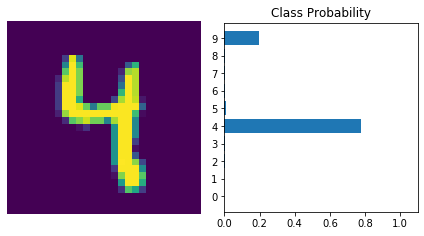

In [12]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)